##Manuela Guisao Sepulveda CC.1007053840

# Examen 1: Métodos computacionales.

## Profesor: Hernán Salinas
### Universidad de Antioquia


El examen consta de 7 puntos, cada uno de igual valor, el uso de herramientas de IA no esta permitido. Puede usar la documentacion de scipy, numpy, matplotlib.

La entrega se realiza a través del github del curso.


#### Examen

Una esfera de masa $m$ es lanzada desde la superficie de la tierra con velocidad $\vec{v_0}$. Las fuerzas que actúan sobre la bolita son: el peso $m\vec{g}$, y la fuerza de rozamiento $\vec{f}=-mb\vec{v}_0$ que el  aire ejerce sobre la bolita. Un digrama de cuerpo libre es esquematizado en la siguiente figura.

![Movimiento parabolico](http://www.sc.ehu.es/sbweb/fisica/dinamica/stokes2/stokes1.gif)

Para dar solución al movimiento de la bolita, se debe plantear las ecuaciones de movimiento desde la segunda ley de Newton y después solucionarla para encontrar la ecuaciones de posición y velocidad. Su tarea será determinar el valor del alcance máximo para diferentes ángulos de lanzamiento. Para ello lea detenidamente lo siguiente:  

Las **ecuaciones de movimiento** de la bolita vienen dadas por:
\begin{equation}
m\frac{\mathrm{d}v_x}{\mathrm{d}t} = - mbv_x
\end{equation}


\begin{equation}
m\frac{\mathrm{d}v_y}{\mathrm{d}t} = - mg-mbv_y
\end{equation}


donde:

$v_{0x}=v_0\cos \theta$,  $v_{0y}=v_0\sin \theta$,  $b$ el coeficiente de rozamiento con el aire, y $g$ la aceleración de la gravedad


La solución a las ecuaciones anteriores para la **posición ($x$, $y$) y la velocidad ($v_x$, $v_y$)**  son:


\begin{equation}
x =  \frac{v_{0x}}{b}\left( 1-e^{-bt} \right)
\end{equation}

\begin{equation}
y =  \frac{1}{b}\left( \frac{g}{b}+v_{0y}\right)(1-e^{-bt})-\frac{g}{b}t
\end{equation}


\begin{equation}
v_x = v_{0x}e^{-bt}
\end{equation}

\begin{equation}
v_y = \left(\frac{g}{b}+v_{0y} \right) e^{-bt}-\frac{g}{b}
\end{equation}



**Alcance máximo**

El tiempo asociado al alcance máximo del proyectil se da cuando $x=R$, despejando de la ecuación para $x$ el tiempo, se tiene que:

\begin{equation}
t_v=-\frac{1}{b} \ln \left(1-\frac{Rb}{v_{0x}} \right)
\end{equation}

Reemplanzando en la ecuación para $y$ obtenemos que:
\begin{equation}
y =\left(\frac{g}{b} + v_{0y}  \right) \frac{R}{v_{0x}}+\frac{g}{b^2}\ln \left(1-\frac{Rb}{v_{0x}} \right)
\end{equation}

El alcance máximo R, estará deteminado cuando $y=0$ en la anterior ecuación. Notese que es una ecuación trascendental. Su tarea será determinar el valor de R para diferentes ángulos de lanzamiento, para ello realice lo siguiente:





1. Construir una función de python paramétrica para determinar el valor de R.
$y = f(R, \theta, v_{ox},v_{oy},b,g)$



2. Asumiento que la bolita es lanzada con una rapidez de
$v_0=55\mathrm{m}/\mathrm{s}$ y un ángulo de $45^{\circ}$ respecto a la horizontal, $b=0.005$ y $g=9.8\mathrm{m}/\mathrm{s^2}$, determine el alcance máximo. Emplee el método que desee.


3. Valide el resutado anterior, con un método diferente al que empleo en el apartado anterior y además, determine el tiempo de vuelo $t_v$.  


4. Construya una gráfica de $x$ vs $t$, $y$ vs $t$, $x$ vs $y$. Asegurese de  no superar en las trayectorias los tiempos establecidos por el  tiempo de vuelo $t_v$.

Ahora,  vamos a mostrar la trayectoria para múltiples ángulos de lanzamiento.

5. Suponiendo,  $b=0.009$, $v_0 = 40\mathrm{m}/\mathrm{s}$ y  $\theta$ entre $0<\theta<90^{\circ}$ en pasos de $5^{\circ}$:
```python
theta=np.arange(0, 90, 5)
theta=np.deg2rad(theta)
```


generalice el resultado del punto  número 2  para determinar el conjunto de valores de R asociados a cada ángulo. Con lo anterior determine los tiempos de vuelo.

6. Realice un gráfico de $R$ vs $t_v$

7. Finalmente, construya todas las trayectorias ($y$ vs $x$) para cada ángulo $\theta$.













In [74]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
import sympy as sp

In [131]:
#ecuacion parametrica
def alcance(R,theta,v0x,v0y,b,g):
  ecu= (g/b+ v0y)*(R/v0x) + (g/b**2)*np.log(1-R*b/v0x)
  return ecu

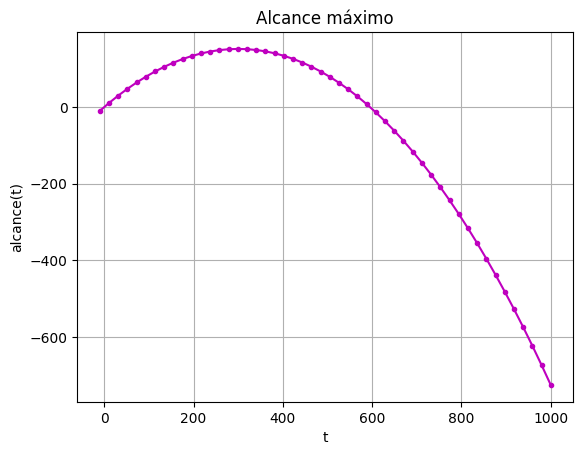

In [183]:
x=np.linspace(-10,1000,50)
def alcance(R,theta,v0x,v0y,b,g):
  ecu= (g/b+ v0y)*(R/v0x) + (g/(b**2))*np.log(1-(R*b)/v0x)
  return ecu


y= alcance(x,0.7,55,55,0.005,9.8)
plt.plot(x,y, '.m-')
plt.title('Alcance máximo')
plt.xlabel('t')
plt.ylabel('alcance(t)')
plt.grid()

In [159]:
#hallando raices por metodo de secante
b=0.005
g=9.8
theta= np.deg2rad(45)
v0x=55
v0y=55

ec= lambda R: (g/b + v0y)*R/v0x + (g/(b**2))*np.log(1- R*b/v0x)

raiz= optimize.newton(ec,500)
print(f'el alcance maximo R es {raiz}')

el alcance maximo R es 594.9823531902708


In [160]:
#hallar la misma raiz con el metodo de punto fijo
b=0.005
g=9.8
theta= np.deg2rad(45)
v0x=55
v0y=55

ec= lambda R: (g/b + v0y)*R/v0x + (g/(b**2))*np.log(1- R*b/v0x)
fixed= lambda R: R-ec(R)

raiz_puntofijo= optimize.fixed_point(fixed,500)
print(f'el alcance maximo R por el metodo de punto fijo es {raiz_puntofijo}')

el alcance maximo R por el metodo de punto fijo es 594.9823531902593


In [161]:
#tiempo de vuelo con la raiz hallada con el metodo de secante, y los parametros dados en el punto b
v0x=55
b=0.005
R= raiz
tv= -1/b*np.log(1-R*b/v0x)
print(f'el tiempo de vuelo es {tv} segundos')

el tiempo de vuelo es 11.121423392192904 segundos


In [162]:
#tiempo de vuelo con la raiz hallada en punto fijo
v0x=55
b=0.005
R= raiz_puntofijo
tv= -1/b*np.log(1-R*b/v0x)
print(f'el tiempo de vuelo es {tv} segundos')

el tiempo de vuelo es 11.121423392192693 segundos


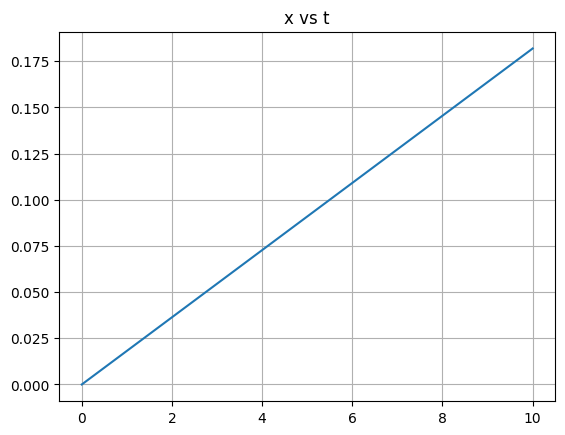

In [186]:
#gráficas
x= np.linspace(0,10,100)
t= lambda R: -1/b*np.log(1-R*b/v0x)
tiempo= t(x)

plt.plot(x,tiempo)
plt.title('x vs t')
plt.grid()

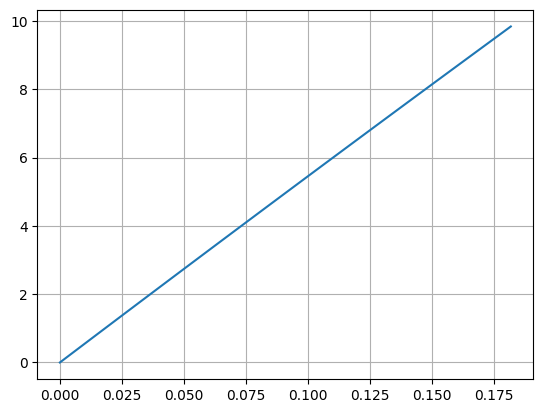

In [193]:
#graficas y vs t
m= np.linspace(0,10,100)
t = t= lambda R: -1/b*np.log(1-R*b/v0x)
tm=t(m)
y= lambda R: (g/b + v0y)*R/v0x + (g/(b**2))*np.log(1- R*b/v0x)
ym= y(m)

plt.plot(tm,ym)
plt.grid()

In [206]:
#quinto punto
R= raiz
g=9.8
b=0.009
v0x=40
v0y=40
theta=np.arange(0, 90, 5)
theta=np.deg2rad(theta)
alcancemax= np.zeros(len(theta))
cont=0

ec= lambda R: (g/b + v0y)*R/v0x + (g/(b**2))*np.log(1- R*b/v0x)

for i in theta:
  alcance_max= optimize.newton(ec,500)
  alcancemax[cont]= alcance_max
  cont = cont +1

for i in range(0,len(theta)):
  print(f'para el angulo {theta[i]} el alcance maximo es {alcancemax[i]}')



para el angulo 0.0 el alcance maximo es 311.19594512339756
para el angulo 0.08726646259971647 el alcance maximo es 311.19594512339756
para el angulo 0.17453292519943295 el alcance maximo es 311.19594512339756
para el angulo 0.2617993877991494 el alcance maximo es 311.19594512339756
para el angulo 0.3490658503988659 el alcance maximo es 311.19594512339756
para el angulo 0.4363323129985824 el alcance maximo es 311.19594512339756
para el angulo 0.5235987755982988 el alcance maximo es 311.19594512339756
para el angulo 0.6108652381980153 el alcance maximo es 311.19594512339756
para el angulo 0.6981317007977318 el alcance maximo es 311.19594512339756
para el angulo 0.7853981633974483 el alcance maximo es 311.19594512339756
para el angulo 0.8726646259971648 el alcance maximo es 311.19594512339756
para el angulo 0.9599310885968813 el alcance maximo es 311.19594512339756
para el angulo 1.0471975511965976 el alcance maximo es 311.19594512339756
para el angulo 1.1344640137963142 el alcance maximo